In [71]:
] build MolecularGraph

  Building Cxx → `C:\Users\Kelvyn\.julia\packages\Cxx\1RaOv\deps\build.log`


In [104]:
using MolecularGraph, DataFrames

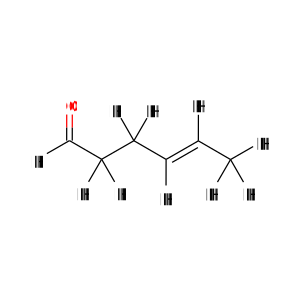

In [105]:
mol = makehydrogensexplicit(smilestomol("O=CCCC=CC"))
mol_svg = drawsvg(mol, 300, 300)
display("image/svg+xml",  mol_svg)

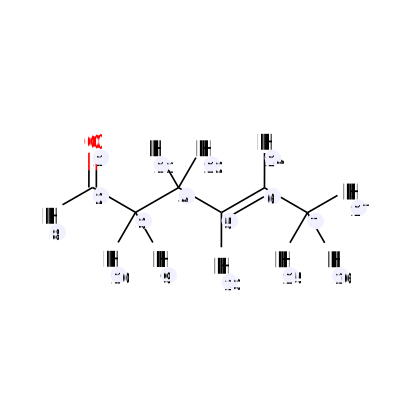

,Group,Counts,Sets
,String,Int64,String
1,O=CH,1,"[1, 2]"
2,CH=CH,1,"[5, 6]"
3,CH3,1,[7]
4,CH2,2,[4][3]
5,CH,3,[6][5][2]
6,C,6,[6][4][3][5][2][7]


In [106]:
canvas = SvgCanvas()
draw2d!(canvas, mol)
drawatomindex!(canvas, mol)
mol_svg = tosvg(canvas, 400, 400)
display("image/svg+xml",  mol_svg)

fg = functionalgroupgraph(mol)
funcgroups = DataFrame(Group = String[], Counts = Int[], Sets = String[])

for (term, components) in fg.componentmap
    nodes = [sort(collect(comp)) for comp in components]
    push!(funcgroups, (string(term), length(collect(nodes)), string(nodes...)))
end

display(funcgroups)

In [99]:
Tb = 244.7889 * log(1*0.9218 + 2*0.5780 + 1.2001 + 2.1021 - 0.0063 - 0.1057)
Tc = 181.6738 * log(1*1.0898 + 2*3.4604 + 8.2552 + 11.2208 + 0.0894 - 0.2233)

println("Tb = ", Tb, " K")
println("Tc = ", Tc, " bar")

Tb = 406.7536675703762 K
Tc = 601.1250389277233 bar


In [125]:
svg_string = drawsvg(mol, 300, 300)

open("output.svg", "w") do io
    write(io, svg_string)
end

2962